# Importing libraries, datasets and pre-processing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date,timedelta
from datetime import date
import locale
from locale import atof

In [2]:
df_cab = pd.read_csv('Cab_Data.csv')
df_city = pd.read_csv('City.csv')
df_cusid = pd.read_csv('Customer_ID.csv')
df_transid = pd.read_csv('Transaction_ID.csv')
df_holiday= pd.read_csv('Holiday.csv')

In [3]:
for i in range(359392):
    df_cab['Date of Travel'][i] = date(1900,1,1)+timedelta(int(df_cab['Date of Travel'][i])-2)
df_cab.head(5)

C:\Users\Ruizhe Zhang\AppData\Local\Temp\ipykernel_35920\4241785755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cab['Date of Travel'][i] = date(1900,1,1)+timedelta(int(df_cab['Date of Travel'][i])-2)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
df1 = df_cab.merge(df_transid, how='left', on='Transaction ID').merge(df_cusid, how='left', on='Customer ID').dropna()
df1['Revenue']=df1['Price Charged']-df1['Cost of Trip']
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Revenue
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,16.844


In [5]:
df_tmp = df1[['City','KM Travelled','Price Charged','Revenue']].groupby(by='City').sum()
df_tmp
df_tmp['Number of Rides'] = df1.groupby(by='City').count()['Transaction ID']
df2 = df_city.merge(df_tmp,how='left',on='City').set_index('City').dropna()
df2['Avg Price'] = df2['Price Charged']/df2['KM Travelled']
df2

,Population,Users,KM Travelled,Price Charged,Revenue,Number of Rides,Avg Price
City,,,,,,,
NEW YORK NY,"8,405,837","302,149",2248809.74,56954061.67,2.796256e+07,99885.0,25.326314
CHICAGO IL,"1,955,130","164,468",1281704.39,19841318.52,3.387313e+06,56625.0,15.480417
LOS ANGELES CA,"1,595,037","144,132",1088735.65,17795624.41,4.411709e+06,48033.0,16.345221
MIAMI FL,"1,339,155","17,675",145418.17,2580135.20,7.583012e+05,6454.0,17.742867
SILICON VALLEY,"1,177,609","27,247",193712.97,3684102.15,1.316705e+06,8519.0,19.018356
ORANGE COUNTY,"1,030,185","12,994",88826.69,1554873.21,4.570019e+05,3982.0,17.504572
SAN DIEGO CA,"959,307","69,995",460503.69,7136380.59,1.587163e+06,20488.0,15.496902
PHOENIX AZ,"943,999","6,133",45825.08,756682.64,1.929409e+05,2064.0,16.512413
DALLAS TX,"942,908","22,157",157782.05,3142429.91,1.128733e+06,7017.0,19.916270


# Hypotheses and relative analysis

### Hypothesis 1: Customer's age is related to the number of customers and average times of taking taxi.

Firstly, I got all customers' ages and divided them into 8 groups by age intervals:

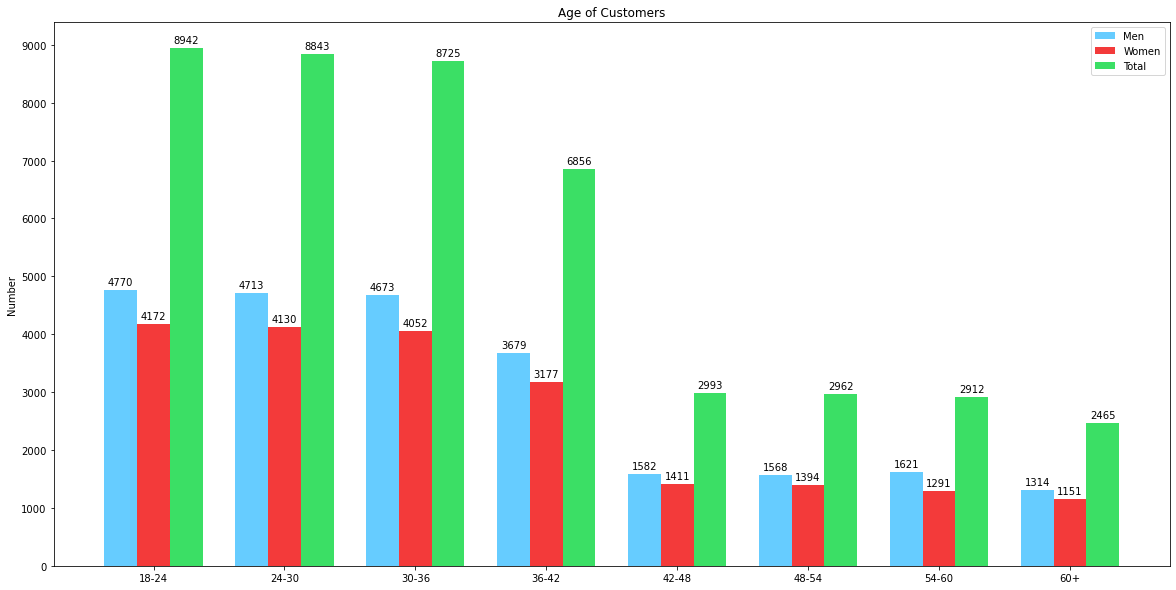

In [6]:
# age and # of customers
age_interval = ['18-24','24-30','30-36','36-42','42-48','48-54','54-60','60+']
a = df1[['Customer ID','Age','Gender']].drop_duplicates(subset='Customer ID')[['Age','Gender']]
age_m = a[a.Gender=='Male'].groupby(by=pd.cut(a[a.Gender=='Male']['Age'], np.arange(18, 67, 6))).count()['Age']
age_f = a[a.Gender=='Female'].groupby(by=pd.cut(a[a.Gender=='Female']['Age'], np.arange(18, 67, 6))).count()['Age']
age_t = age_m + age_f
x = np.arange(len(age_interval))
width = 0.25
fig1, ax1 = plt.subplots(figsize=(20,10))
rects1 = ax1.bar(x - width, age_m, width, label='Men', color='#66CCFF')
rects2 = ax1.bar(x, age_f, width, label='Women', color='#F33A3A')
rects3 = ax1.bar(x + width, age_t, width, label='Total',color='#3BDF65')
ax1.set_ylabel('Number')
ax1.set_title('Age of Customers')
ax1.set_xticks(x)
ax1.set_yticks(np.arange(0,9001,1000))
ax1.set_xticklabels(age_interval)
ax1.legend()
ax1.bar_label(rects1, padding=3)
ax1.bar_label(rects2, padding=3)
ax1.bar_label(rects3, padding=3)
plt.show()

From the bar chart above, although there is slight difference for men in 54-60 yrs old interval, generally there are more number of customers in younger group, and the difference is obvious betwween the groups less than 42 years old and the groups more than 42 years old. Besides, the number of male customers is larger than that of female customers for each age group. Therefore, we can conclude that age is related to the number of customers.

Next thing that I did was to calculate average number of times of taking taxis per customer for each age group:

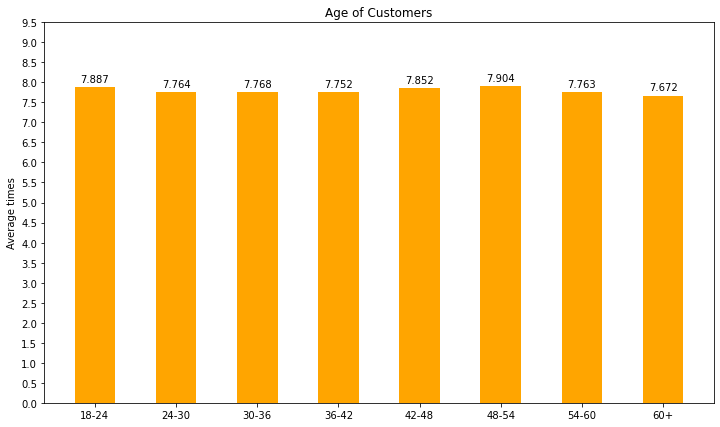

In [7]:
# age and avg times of taking the cab
df_ageavg = df1.groupby(by=pd.cut(df1['Age'], np.arange(18, 67, 6))).count()
df_ageavg["Average times"] = (df_ageavg["Age"]/age_t).round(3)
fig2, ax2 = plt.subplots(figsize=(12,7))
x = np.arange(len(age_interval))
rects4 = ax2.bar(x, df_ageavg["Average times"], width=0.5, label='Total',color="orange")
ax2.set_ylabel('Average times')
ax2.set_title('Age of Customers')
ax2.set_xticks(x)
ax2.set_yticks(np.arange(0,10,0.5))
ax2.set_xticklabels(age_interval)
ax2.bar_label(rects4, padding=3)
plt.show()

From the chart above, there are not significant difference in number of times of taking taxis among different groups, so it seems that age is not related to frequency of taking taxi. In order to prove this, the correlation between age and frequency was calculated below:

In [8]:
# Correlation between times and age
b = df1[['Customer ID','Age']].drop_duplicates(subset='Customer ID').sort_values(by='Customer ID').reset_index().drop('index',axis=1)
b['Times'] = df1.groupby(by='Customer ID').count().reset_index()['Age']
b[['Age','Times']].corr()

,Age,Times
Age,1.000000,-0.001462
Times,-0.001462,1.000000


The correlation value is -0.0015, which is small enough to prove the irrelevance between age and frequency of taking taxis.

### Hypothesis 2: The more popular cab company is also more efficient in making revenues.

Firstly, the total number of orders, total revenue and average revenue per order of each cab company were calculated:

In [9]:
c = df1.groupby(by="Company").count()[['Date of Travel','Age']]
c['Revenue'] = df1.groupby(by='Company').sum()['Revenue']
c = c.drop('Age', axis=1)
c = c.rename(columns={'Date of Travel':"Number of orders","Revenue":"Revenue"})
c['Average Revenue'] = c['Revenue']/c['Number of orders']
c

,Number of orders,Revenue,Average Revenue
Company,,,
Pink Cab,84711,5.307328e+06,62.652174
Yellow Cab,274681,4.402037e+07,160.259986


From the result, Yellow Cab Company are more popular than Pink Cab Company(since it has much more number of orders). Besides, it has more average revenue per order, so it is also more efficient in making revenues, which proved the correctness of the hypothesis.

But why? Here are 2 hypotheses: 1. Yellow Cab Company has more long-distance orders; 2. Yellow Cab Company has less costs. 

Firstly the percentage distribution of distence travelled for each company was shown in the pie chart below:

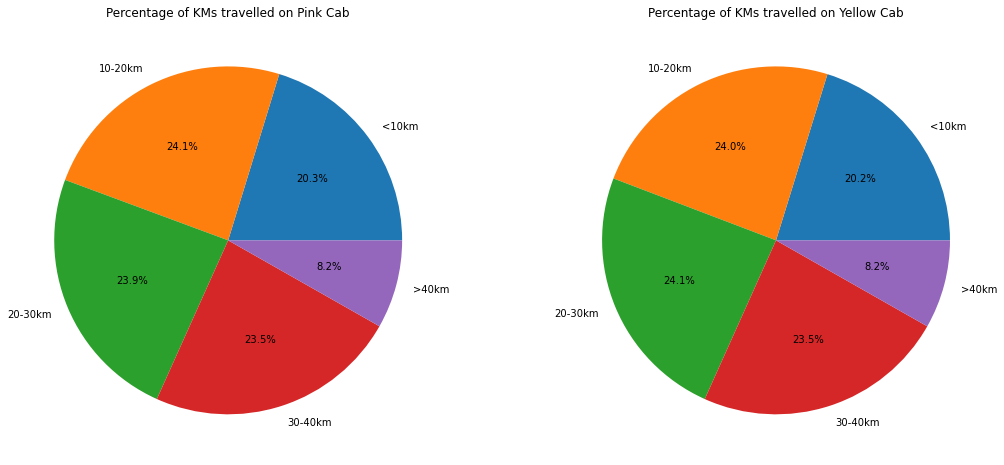

In [10]:
gb_pink = df1[df1.Company=='Pink Cab'].groupby(by=pd.cut(df1['KM Travelled'], np.arange(0,51,10))).count()
gb_yellow = df1[df1.Company=='Yellow Cab'].groupby(by=pd.cut(df1['KM Travelled'], np.arange(0,51,10))).count()
df_company = pd.DataFrame(gb_pink["Transaction ID"]/gb_pink["Transaction ID"].sum()).rename(columns={"Transaction ID":"Pink"})
df_company["Yellow"] = gb_yellow["Transaction ID"]/gb_yellow["Transaction ID"].sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
label = ['<10km','10-20km','20-30km','30-40km','>40km']
ax1.pie(df_company['Pink'],labels=label,autopct='%1.1f%%')
ax2.pie(df_company['Yellow'],labels=label,autopct='%1.1f%%')
ax1.set_title('Percentage of KMs travelled on Pink Cab')
ax2.set_title('Percentage of KMs travelled on Yellow Cab')
plt.show()

The percentage distribution of the two companies is almost the same, so the first hypothesis can be excluded.

For the second hypothesis, I calculated the proportion between the cost and the price charged:

In [11]:
gb_company = df1.groupby(by='Company').sum()
gb_company['Cost of Trip']/gb_company['Price Charged']

Company
Pink Cab      0.798417
Yellow Cab    0.650226
dtype: float64

From the result, obviously Yellow Cab Company has less cost than Pink Cab Company, so the second hypothesis can be proved.

### Hypothesis 3: The yearly and monthly patterns of the change of price per KM in the two companies are similar

First calculate and visualize yearly change of average prices per KM by year:

In [12]:
df1['Year'] = pd.DatetimeIndex(df1['Date of Travel']).year
df1['Month'] = pd.DatetimeIndex(df1['Date of Travel']).month
df1['Price per KM'] = df1['Price Charged']/df1['KM Travelled']
df_price = df1[['Company','Price per KM','Year','Month']]
df_price.head()

,Company,Price per KM,Year,Month
0,Pink Cab,12.182266,2016,1
1,Pink Cab,12.526904,2016,1
2,Pink Cab,13.849558,2016,1
3,Pink Cab,11.377751,2016,1
4,Pink Cab,13.129439,2016,1


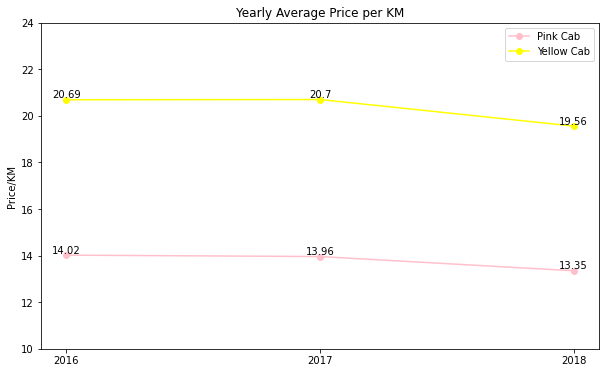

In [13]:
price_ypk = df_price[df_price.Company=='Pink Cab'][['Price per KM',"Year"]].groupby(by='Year').mean()['Price per KM'].round(2)
price_yyl = df_price[df_price.Company=='Yellow Cab'][['Price per KM',"Year"]].groupby(by='Year').mean()['Price per KM'].round(2)
x = np.arange(3)
fig4, ax4 = plt.subplots(figsize=(10,6))
plot_pk = ax4.plot(x, price_ypk, 'o-', label='Pink Cab', color='pink')
plot_yl = ax4.plot(x, price_yyl, 'o-', label='Yellow Cab', color='yellow')
for a,b in zip(x,price_ypk):
    plt.text(a,b,str(b),ha='center',va='bottom')
for a,b in zip(x,price_yyl):
    plt.text(a,b,str(b),ha='center',va='bottom')
ax4.set_ylabel('Price/KM')
ax4.set_title('Yearly Average Price per KM')
ax4.set_xticks(x)
ax4.set_xticklabels([2016,2017,2018])
ax4.set_yticks(np.arange(10,26,2))
ax4.legend()
plt.show()

Generally the change patterns of the two companies are similar: the price decreased from 2016 to 2018.

Next the average prices for each month were calculated and visualized to compare prices monthly:

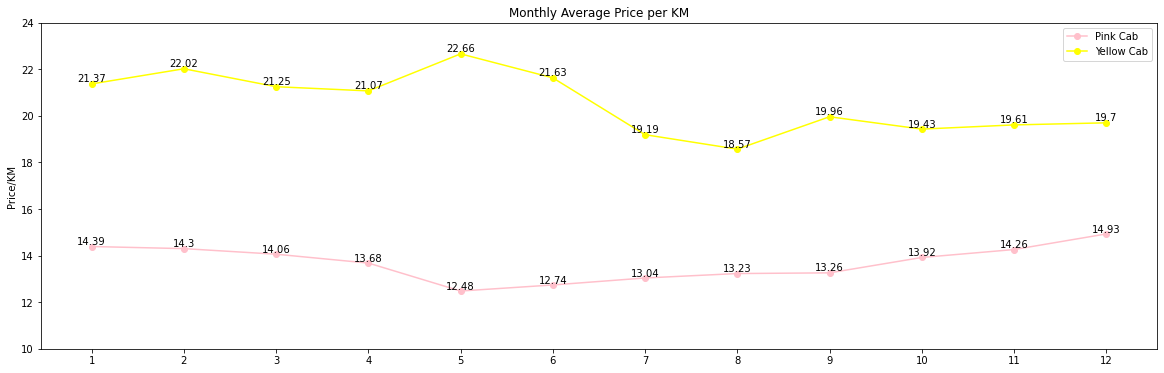

In [14]:
price_mpk = df_price[df_price.Company=='Pink Cab'][['Price per KM',"Month"]].groupby(by='Month').mean()['Price per KM'].round(2)
price_myl = df_price[df_price.Company=='Yellow Cab'][['Price per KM',"Month"]].groupby(by='Month').mean()['Price per KM'].round(2)
x = np.arange(12)
fig5, ax5 = plt.subplots(figsize=(20,6))
plot_mpk = ax5.plot(x, price_mpk, 'o-', label='Pink Cab', color='pink')
plot_myl = ax5.plot(x, price_myl, 'o-', label='Yellow Cab', color='yellow')
for a,b in zip(x,price_mpk):
    plt.text(a,b,str(b),ha='center',va='bottom')
for a,b in zip(x,price_myl):
    plt.text(a,b,str(b),ha='center',va='bottom')
ax5.set_ylabel('Price/KM')
ax5.set_title('Monthly Average Price per KM')
ax5.set_xticks(x)
ax5.set_xticklabels(np.arange(1,13,1))
ax5.set_yticks(np.arange(10,26,2))
ax5.legend()
plt.show()

The trends of two line are different, and from April to August the trends are the obviously opposite. Therefore, Hypothesis 3 is halfly correct and halfly wrong.

In order to check whether the trends of the two companies are related, I calculated the correlation:

In [15]:
pd.Series.corr(price_mpk,price_myl)

-0.15696360825932218

Although the correlation is not strong enough, we can conclude that the trends are negatively related, which is the same as the obvious pattern between April and August.

### Hypothesis 4: In holidays customers tend to travel further than in normal days.

Firstly I grouped KM travelled and number of orders by date, combining the grouped data and a list of holidays between 2016 to 2018 into a new dataframe(0 means not holiday, 1 means holiday):

In [16]:
d = df1[['Date of Travel','KM Travelled']].groupby(by='Date of Travel').sum().reset_index()
e = df1[['Date of Travel','KM Travelled']].groupby(by='Date of Travel').count().reset_index()
df_KM = pd.DataFrame(data={'Date':df_holiday['Date of Travel'],'KM Travelled':d['KM Travelled'],'Holiday':df_holiday['Holiday?'],'Number of Orders':e['KM Travelled']})
df_KM

,Date,KM Travelled,Holiday,Number of Orders
0,2016-01-02,4093.96,1,181
1,2016-01-03,4169.83,1,178
2,2016-01-04,528.47,0,25
3,2016-01-05,1242.83,0,47
4,2016-01-06,2435.43,0,109
...,...,...,...,...
1090,2018-12-27,7098.07,0,318
1091,2018-12-28,18581.99,0,843
1092,2018-12-29,18833.22,1,825
1093,2018-12-30,5777.70,1,257


Then I grouped the new dataframe by whether the day is a holiday, showing the mean of travel distance and number of orders, then calculated average distance per order:

In [17]:
f = df_KM[['KM Travelled','Holiday','Number of Orders']].groupby(by='Holiday').mean()
f['Average KM per Order'] = f['KM Travelled']/f['Number of Orders']
f

,KM Travelled,Number of Orders,Average KM per Order
Holiday,,,
0,6145.109558,272.467202,22.553575
1,10115.211897,447.870690,22.585117


From the result, we can see that there are obviously more orders and further distance travelled in holidays, which conforms to our common sense. However, surprisingly the average distance per order are very close, and the difference is not large enough to prove the hypothesis. To further check this, I calculated the correlation between travel distance and holiday:

In [18]:
df_KM[['KM Travelled','Holiday']].corr()

,KM Travelled,Holiday
KM Travelled,1.000000,0.356598
Holiday,0.356598,1.000000


From the result, the two variavles are positively weakly correlated, which seems like a good support of the hypothesis.

### Hypothesis 5: The price of taxi in each city is related to number of users and customers' income

First Calculate average income of the customers in each city and combine all needed columns into a new dataframe

In [19]:
df2['Avg Income'] = df1.groupby(by='City').mean()['Income (USD/Month)']
df3 = df2[['Avg Price','Avg Income']]
g = df2['Users'].str.split(',',expand=True)
df3['Users'] = g[0]+g[1]
df3['Users'] = pd.to_numeric(df3['Users'])
df3

C:\Users\Ruizhe Zhang\AppData\Local\Temp\ipykernel_35920\2690174151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Users'] = g[0]+g[1]
C:\Users\Ruizhe Zhang\AppData\Local\Temp\ipykernel_35920\2690174151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Users'] = pd.to_numeric(df3['Users'])


,Avg Price,Avg Income,Users
City,,,
NEW YORK NY,25.326314,15184.765801,302149
CHICAGO IL,15.480417,15101.718269,164468
LOS ANGELES CA,16.345221,15064.550455,144132
MIAMI FL,17.742867,14984.887202,17675
SILICON VALLEY,19.018356,15248.547717,27247
ORANGE COUNTY,17.504572,15188.944500,12994
SAN DIEGO CA,15.496902,15049.874854,69995
PHOENIX AZ,16.512413,15012.038275,6133
DALLAS TX,19.916270,14846.508194,22157


Then calculate the correlation matrix of these three columns:

In [20]:
df3.corr()

,Avg Price,Avg Income,Users
Avg Price,1.000000,0.272014,0.569216
Avg Income,0.272014,1.000000,0.296221
Users,0.569216,0.296221,1.000000


From the result, the number of users are significantly positively related to average price, and average income is weakly positively related to average price, which can generally prove the hypothesis, but since the correlation between users and average price is not large enough, we can not sure whether they are related. 

# Recommendation

From the analysis, the recommendation of cab company is Yellow Cab Company, based on three main reasons: more popularity across the country; more revenue from each order; better control of costs.